In [1]:
import cv2
import numpy as np
import copy, time
from matplotlib import pyplot as plt
from platform import python_version

In [2]:
python_version()

'3.5.2'

In [3]:
cv2.__version__

'3.2.0'

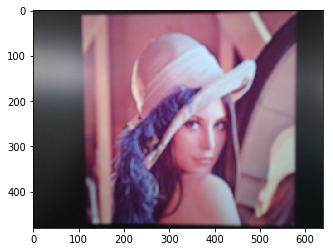

In [4]:
# Webカメラから画像をキャプチャ
cap = cv2.VideoCapture(0)
# カメラが安定するまで少し待つ
time.sleep(1)
# 読み込んだ結果を保存
ret, frame = cap.read()
# Webカメラを解放
cap.release()

if not ret:
    # Webカメラからの取り込みに失敗した場合はエラーメッセージを表示
    print("WEBCAM ERR, try again")
else:
    # 結果を表示
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.show()

result
(x,y)=(310,199) Hight:146, Width:146


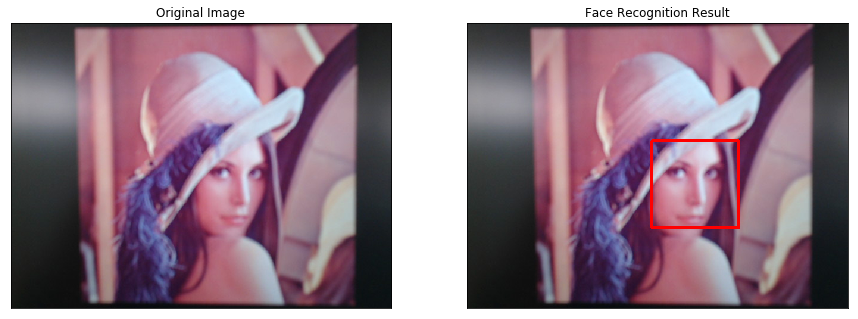

In [5]:
# 顔認識用特徴量のファイル指定
cascade_path = "./haarcascades/haarcascade_frontalface_default.xml"
# カスケード分類器の特徴量を取得する
cascade = cv2.CascadeClassifier(cascade_path)

if not ret:
    print("No data from webcam")
else:
    # 顔認識処理用にグレースケールの画像を用意
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # グレースケールの画像で顔認識処理
    facerecog = cascade.detectMultiScale(frame_gray, scaleFactor=1.1, minNeighbors=1, minSize=(100, 100))
    # 結果表示処理用の画像オブジェクト
    frame_result = copy.copy(frame)
    
    if len(facerecog) > 0:
        # 認識した顔全てに対して処理
        for rect in facerecog:
            # 認識結果を表示
            print ('result\n(x,y)=({0},{1}) Hight:{2}, Width:{3}'.format(str(rect[0]),str(rect[1]),str(rect[2]),str(rect[3])))
            cv2.rectangle(frame_result, tuple(rect[0:2]), tuple(rect[0:2]+rect[2:4]), (0, 0,255), thickness=4)

    fig, sp = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(15, 10))
    sp[0].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    sp[0].set_title('Original Image')
    sp[1].imshow(cv2.cvtColor(frame_result, cv2.COLOR_BGR2RGB))
    sp[1].set_title('Face Recognition Result')

    for i in sp:
        i.set(adjustable='box-forced',aspect='equal')
        i.get_xaxis().set_visible(False)
        i.get_yaxis().set_visible(False)

    plt.show()